In [10]:
import script.setup as st

# Descriptive Analysis of the data

In [11]:
# load setup.py file
# %run setup.py

# load data
df_invited = pd.read_csv('Data/factInvited.csv')
df_proceedings = pd.read_csv('Data/factProceedings.csv')

df = pd.concat([df_invited, df_proceedings], ignore_index=True)

In [12]:
pd.set_option('display.max_rows', 15)

In [4]:
print("Number of rows in factInvited.csv: ", df_invited.shape[0])
print("Number of rows in factProceedings.csv: ", df_proceedings.shape[0])

Number of rows in factInvited.csv:  1311
Number of rows in factProceedings.csv:  194638


In [5]:
print("female ratio for invited",df_invited['gender'].value_counts(normalize=True)['F'])
print("female ratio for proceedings",df_proceedings['gender'].value_counts(normalize=True)['F'])

female ratio for invited 0.23053435114503817
female ratio for proceedings 0.20898796740615913


### Bar Chart Count of Speakers per Conference/Field

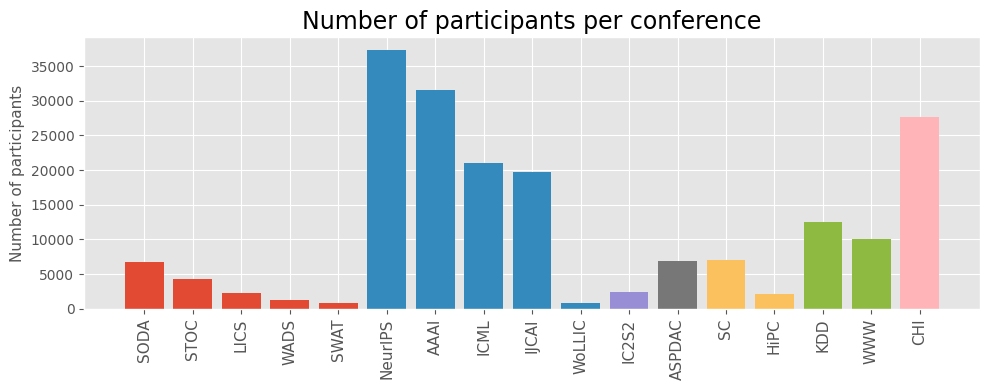

In [7]:
grouped = df_proceedings.groupby(['Main Topic', 'Conference (short)']).count()['Full name'].reset_index(name = "count" ).sort_values(by=['Main Topic','count'], ascending=[True,False])

unique_topics = sorted(df['Main Topic'].unique())
# Create a list of colors corresponding to each unique value in the 'Main Topic' column
# colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_topics)))
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6']

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
for i, topic in enumerate(unique_topics):

    subset = grouped[grouped['Main Topic'] == topic]
    plt.bar(subset['Conference (short)'], subset['count'], color=colors[i], label=topic)

plt.xticks(rotation=90,fontsize=11)
plt.ylabel('Number of participants', fontsize=11)
plt.title('Number of participants per conference', fontsize=17)


plt.tight_layout()
# plt.savefig(image_path+'Bar_Conf_Count_Pro.pdf')
plt.show()

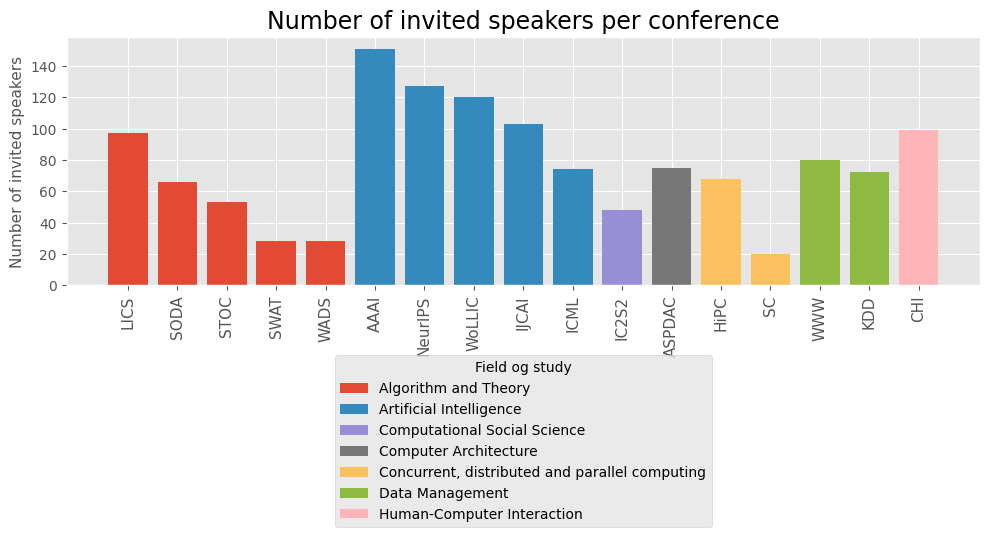

In [22]:
grouped = df_invited.groupby(['Main Topic', 'Conference (short)']).count()['Full name'].reset_index(name = "count" ).sort_values(by=['Main Topic','count'], ascending=[True,False])

unique_topics = sorted(df['Main Topic'].unique())
# Create a list of colors corresponding to each unique value in the 'Main Topic' column
# colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_topics)))
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6']

plt.style.use('ggplot')
plt.figure(figsize=(10, 13))
for i, topic in enumerate(unique_topics):

    subset = grouped[grouped['Main Topic'] == topic]
    plt.bar(subset['Conference (short)'], subset['count'], color=colors[i], label=topic)

plt.xticks(rotation=90, fontsize=11)
plt.ylabel('Number of invited speakers', fontsize=11)
plt.title('Number of invited speakers per conference', fontsize=17)


# Move the legend outside the plot box
# plt.legend(loc='lower center',bbox_to_anchor=(0.5, -1))
legend = plt.legend(loc='lower center',bbox_to_anchor=(0.5, -1))
legend.set_title('Field og study')

plt.tight_layout()
# plt.savefig(image_path+'Bar_Conf_Count_Inv.pdf',bbox_inches='tight')
plt.show()

### Distribution of Gender per Conference/Field

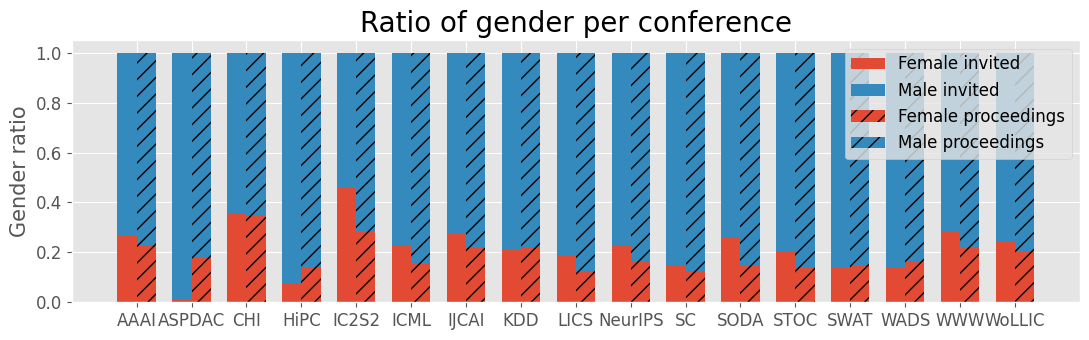

In [52]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    on='Conference (short)',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(11,3.5))
rects1 = ax.bar(x - width/2, female_invited_values, width, label='Female invited')
rects2 = ax.bar(x - width/2, male_invited_values, width, label='Male invited', bottom=female_invited_values)
rects3 = ax.bar(x + width/2, female_proceedings_values, width, label='Female proceedings',hatch="//",color=rects1[0].get_facecolor())
rects4 = ax.bar(x + width/2, male_proceedings_values, width, label='Male proceedings', bottom=female_proceedings_values,hatch="//",color = rects2[0].get_facecolor())

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('')
ax.set_ylabel('Gender ratio', fontsize=15)
ax.set_title('Ratio of gender per conference', fontsize=20)
ax.set_xticks(x)
# ax.set_yticks(fontsize=13)
ax.set_xticklabels(labels,fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.tight_layout()
# plt.savefig(image_path+'Bar_Conf_Ratio_stacked.pdf',bbox_inches='tight')

plt.show()

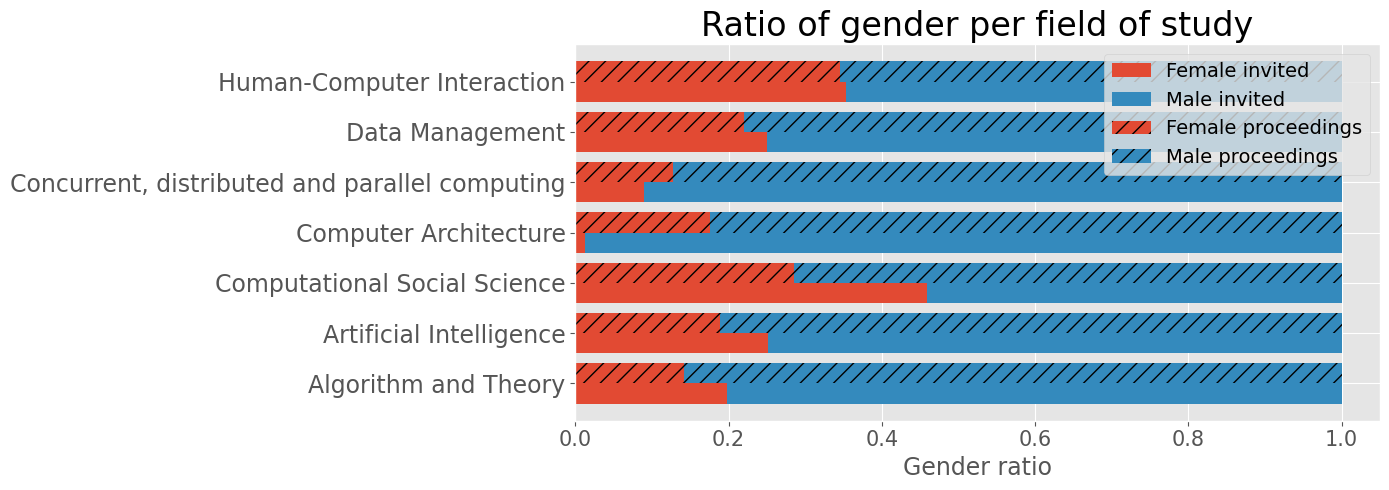

In [58]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    on='Main Topic',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']

fig, ax = plt.subplots(figsize=(14, 5))
width = 0.4
y = np.arange(len(labels))

rects1 = ax.barh(y, female_invited_values, height=width, label='Female invited')
rects2 = ax.barh(y, male_invited_values, height=width, left=female_invited_values, label='Male invited')
rects3 = ax.barh(y + width, female_proceedings_values, height=width, label='Female proceedings', color=rects1[0].get_facecolor(),hatch = "//")
rects4 = ax.barh(y + width, male_proceedings_values, height=width, left=female_proceedings_values, label='Male proceedings', hatch = "//", color = rects2[0].get_facecolor())

# Legend outside the plot
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(fontsize=14, loc='upper right')

# Axes labels and title
plt.ylabel("")
plt.xlabel("Gender ratio", fontsize=17)
plt.title("Ratio of gender per field of study", fontsize=24)
ax.set_yticks(y + width/2)
ax.set_yticklabels(df_combined.index, fontsize=17)
ax.xaxis.set_tick_params(labelsize=15)

# Invert y-axis to show conference names from top to bottom
# plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig(image_path+'Bar_Field_Ratio_stacked.pdf',bbox_inches='tight')
plt.show()

### Evolution of Gender Representation

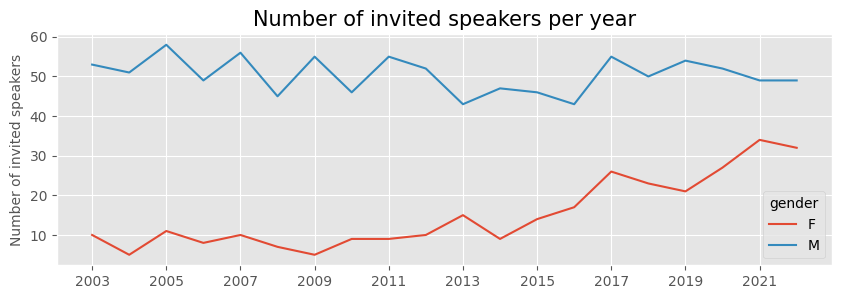

In [63]:
df_invited.groupby(['Year','gender']).size().unstack().plot(kind='line',figsize=(10,3))
plt.title('Number of invited speakers per year', fontsize=15)
plt.ylabel('Number of invited speakers', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
# plt.tight_layout()
# plt.savefig(image_path+'Line_Year_Inv.pdf',bbox_inches='tight')
plt.show()

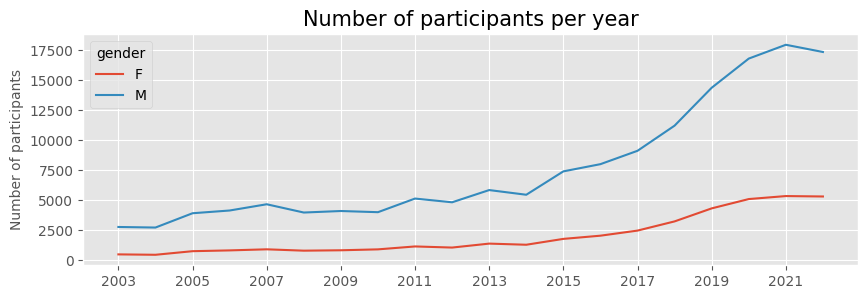

In [64]:
df_proceedings.groupby(['Year','gender']).size().unstack().plot(kind='line',figsize=(10,3))
plt.title('Number of participants per year', fontsize=15)
plt.ylabel('Number of participants', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
# plt.savefig(image_path+'Line_Year_Pro.pdf',bbox_inches='tight')
plt.show()

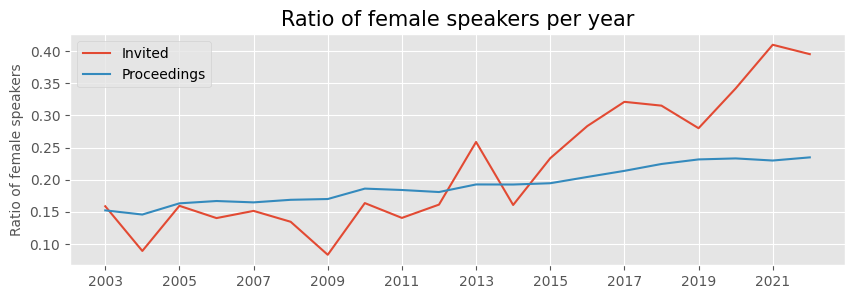

In [66]:
df_invited.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited")
df_proceedings.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings")
plt.title('Ratio of female speakers per year' , fontsize=15)
plt.ylabel('Ratio of female speakers', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
plt.legend()
# plt.savefig(image_path+'Line_Year_Ratio.pdf',bbox_inches='tight')
plt.show()

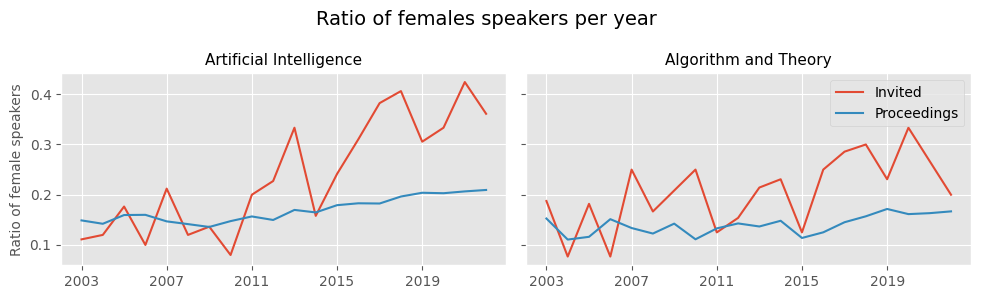

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

conference = df_invited['Main Topic'].unique()[0]
df1 = df_invited[df_invited['Main Topic'] == conference]
df2 = df_proceedings[df_proceedings['Main Topic'] == conference]
df1.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited",ax=ax1)
df2.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings",ax=ax1)
ax1.set_title(conference, fontsize=11)

conference2 = df_invited['Main Topic'].unique()[6]
df3 = df_invited[df_invited['Main Topic'] == conference2]
df4 = df_proceedings[df_proceedings['Main Topic'] == conference2]
df3.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited",ax=ax2)
df4.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings",ax=ax2)
ax2.set_title(conference2, fontsize=11)

# General Plot
fig.suptitle('Ratio of females speakers per year', fontsize=14)
ax1.set_ylabel('Ratio of female speakers', fontsize=10)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_xticks(np.arange(2003, 2023, 4))
ax2.set_xticks(np.arange(2003, 2023, 4))
plt.tight_layout()
plt.legend()
# plt.savefig(image_path+'Line_gender_Ratio_Field.pdf',bbox_inches='tight')
plt.show()

In [70]:
df_year = pd.DataFrame({'Year': list(range(2003, 2023))})

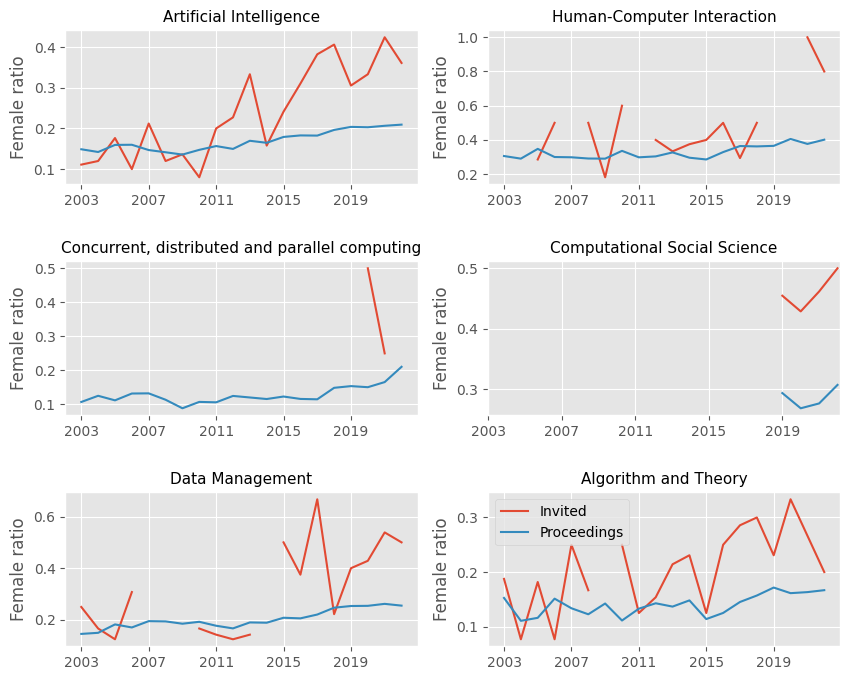

In [72]:
plt.figure(figsize=(10, 17))
plt.subplots_adjust(hspace=0.5)
field = df_invited['Main Topic'].unique()
field = field[field != 'Computer Architecture']

for n, f in enumerate(field):
    ax = plt.subplot(len(field), 2, n + 1)
    
    # Prepare data for the invited
    df_conf_inv = df_invited[df_invited['Main Topic'] == f]
    df_inv_grouped = df_conf_inv.groupby('Year')['gender'].value_counts(normalize=True).reset_index(name='ratio')
    df_inv_filtered = df_inv_grouped[df_inv_grouped['gender'] == "F"]
    df_inv_merged = pd.merge(df_year, df_inv_filtered, on='Year', how='left')
    
    # Prepare data for the proceedings
    df_conf_pro = df_proceedings[df_proceedings['Main Topic'] == f]
    df_pro_grouped = df_conf_pro.groupby('Year')['gender'].value_counts(normalize=True).reset_index(name='ratio')
    df_pro_filtered = df_pro_grouped[df_pro_grouped['gender'] == "F"]
    df_pro_merged = pd.merge(df_year, df_pro_filtered, on='Year', how='left')
    
    # Plot
    ax.plot(range(2003,2023),df_inv_merged['ratio'], label = "Invited")
    ax.plot(range(2003,2023),df_pro_merged['ratio'], label = "Proceedings")
    ax.set_title(f, fontsize=11)
    ax.set_xticks(np.arange(2003, 2023, 4))
    ax.set_ylabel('Female ratio')
plt.legend()
# plt.savefig(image_path+'Line_gender_Ratio_Field_ALL.pdf',bbox_inches='tight')
plt.show()

### Top ten speaker

In [56]:
df_proceedings[df_proceedings['gender']=="F"]['ID'].value_counts().head(15)

Hui Xiong_2             111
Le Song_1                91
Ping Li_2                84
Doina Precup_1           83
Ariel D. Procaccia_1     78
Xing Xie_2               75
Sarit Kraus_1            70
Edith Elkind_1           68
Carla P. Gomes_1         67
Xia Hu_1                 59
Lijun Zhang_2            57
Tommi S. Jaakkola_1      55
Joelle Pineau_1          54
Yun Fu_1                 53
Yiran Chen_1             50
Name: ID, dtype: int64

In [12]:
df_invited['Full name'].value_counts().head(15)

Tim Berners-Lee           9
Prabhakar Raghavan        7
Daphne Koller             7
Cynthia Dwork             6
Lise Getoor               5
Jon Kleinberg             4
Oren Etzioni              4
David Haussler            4
Christos Papadimitriou    4
Michael Kearns            4
Josh Tenenbaum            4
Susan Athey               4
Yann LeCun                4
Stuart Russell            3
Geoffrey E. Hinton        3
Name: Full name, dtype: int64

### Age Plot

In [2]:
def map_age_group(age_range):
    if age_range >=  20:
        return '>20'
    elif age_range >= 15:
        return '15-20'
    elif age_range >= 10:
        return '10-15'
    elif age_range >= 5:
        return '5-10'
    else:
        return '0-5'
    
df_invited['Age Group'] = df_invited['Age'].apply(map_age_group)
df_proceedings['Age Group'] = df_proceedings['Age'].apply(map_age_group)

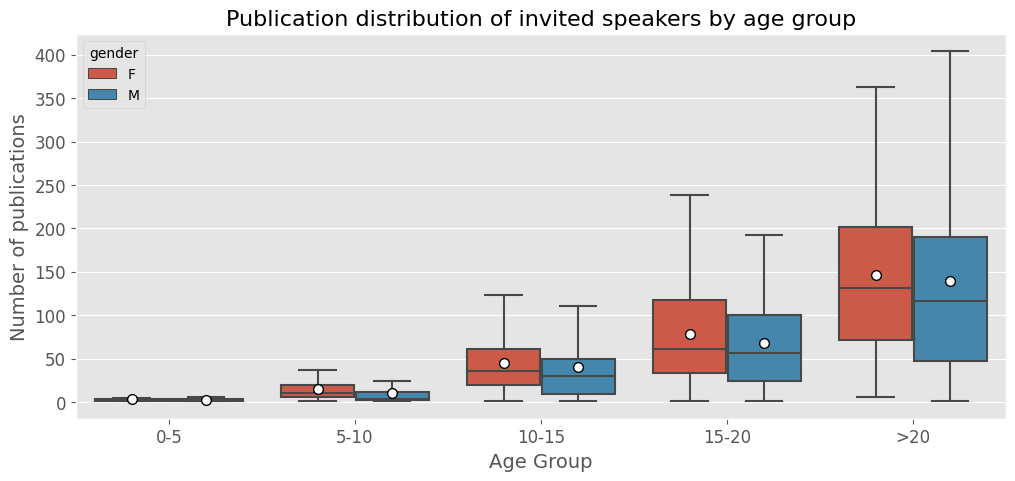

In [4]:
df_test = df_invited[df_invited['Paper Count'] != 0]
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Paper Count",
            hue='gender',
            data=df_test, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=False, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Publication distribution of invited speakers by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of publications', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(image_path+'Boxplot_inv_paper.pdf',bbox_inches='tight')
plt.show()

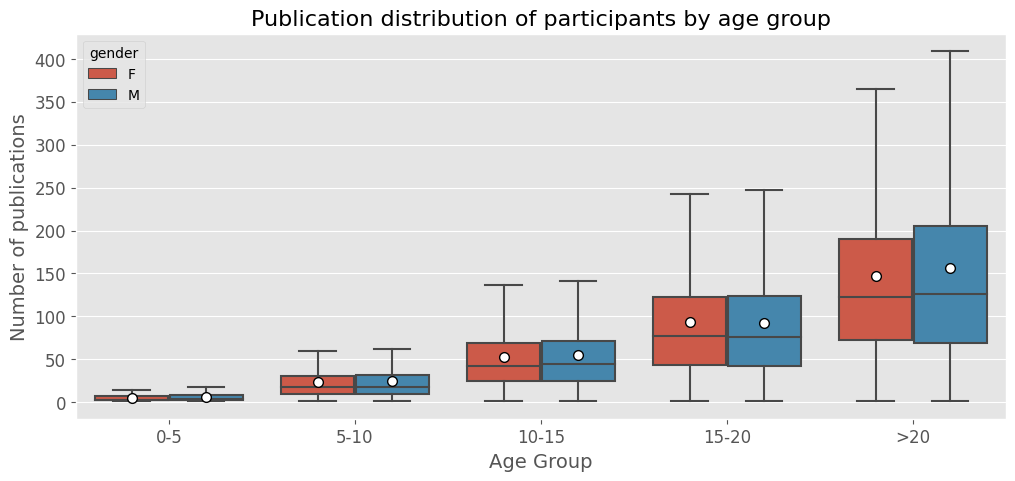

In [5]:
df_test = df_proceedings[df_proceedings['Paper Count'] != 0]
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Paper Count",
            hue='gender',
            data=df_test, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=False, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Publication distribution of participants by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of publications', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(image_path+'Boxplot_pro_paper.pdf',bbox_inches='tight')
plt.show()

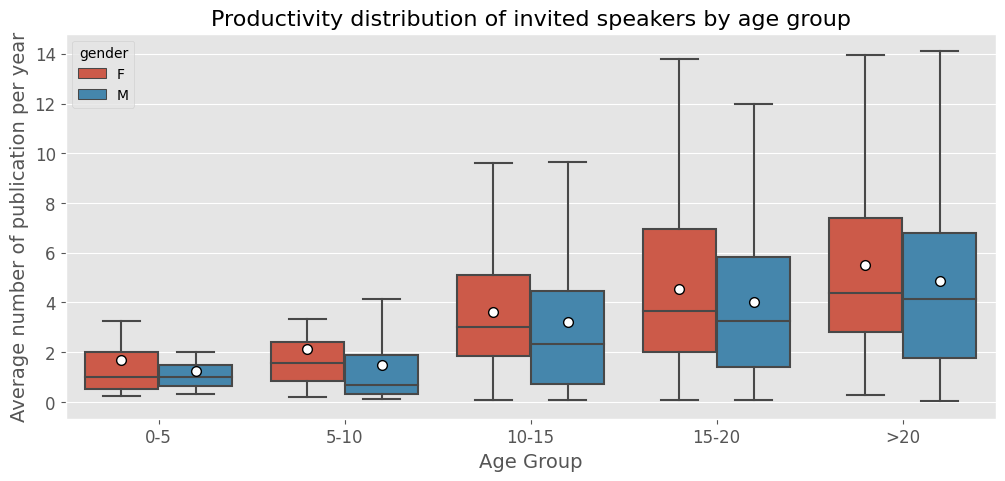

In [6]:
df_test = df_invited[df_invited['Productivity'] != 0]
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Productivity",
            hue='gender',
            data=df_test, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=False, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Productivity distribution of invited speakers by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average number of publication per year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(image_path+'Boxplot_inv_prod.pdf',bbox_inches='tight')
plt.show()

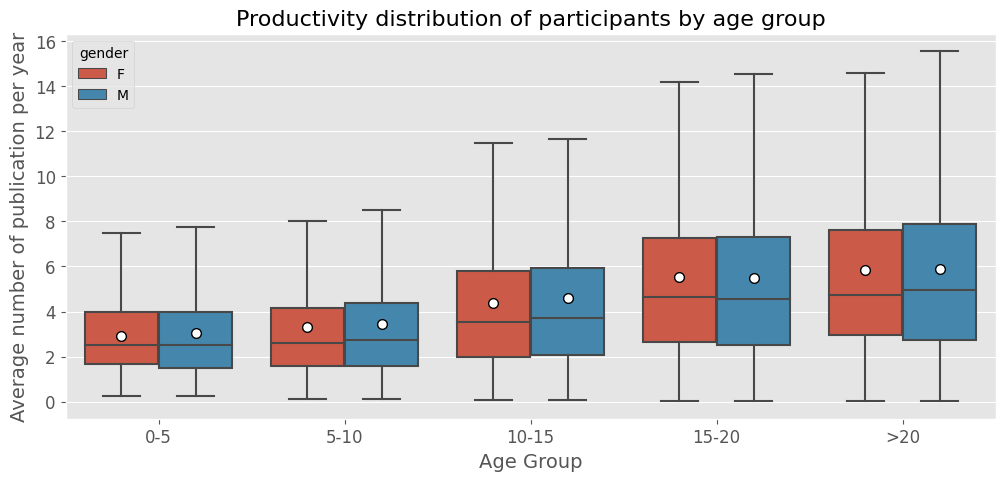

In [5]:
df_test = df_proceedings[df_proceedings['Productivity'] != 0]
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Productivity",
            hue='gender',
            data=df_test, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=False, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Productivity distribution of participants by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average number of publication per year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(image_path+'Boxplot_pro_prod.pdf',bbox_inches='tight')
plt.show()